# Continuacion con arquitecturas de DL
## Fully connecting Layers
Son las ultimas capas de una arquitectura de DL. Para formarlas
se puede hacer una convolucion de $n\times 1 \times 1$
o simplemente usar "flatten". Los parametros son

$$\# \text{training parameters} = (n_i + 1) n_o $$
donde $n_i$ es el numero de nodos de entrada y $n_o$ el
numero de nodos de salida. El +1 es el bias.
La ultima capa es la de clasificacion (softmax, logisitc sigmoid).

# Receptive Field (campo receptivo).
El campo receptivo es la apertura requerida para "iluminar" una sola neurona. Recuerdo el aviso en los espejos de los carros "si usted no ve a mi, yo no lo veo a usted".

Veamos ejemplos







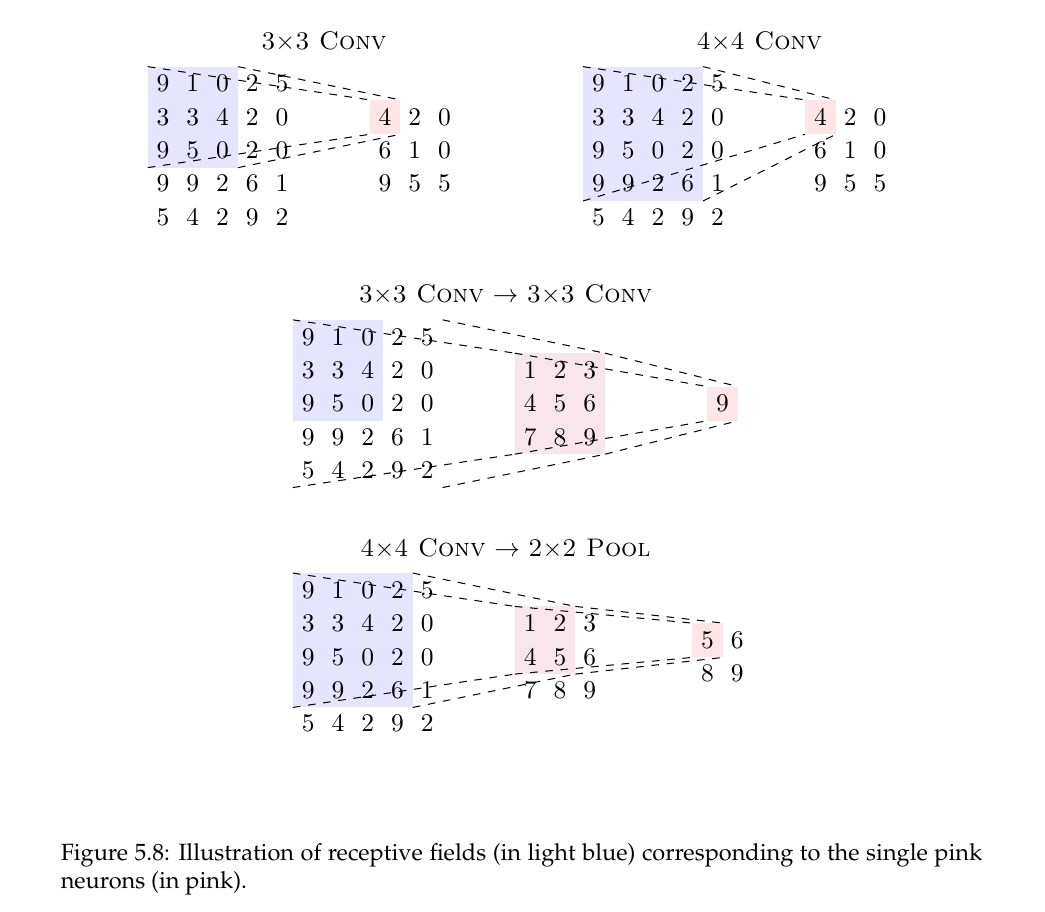

En el primer ejemplo de arriba, el capo receptivo en la convolucion $3x3$ esta dado por la matriz

$$\begin{pmatrix} 9 & 1 & 0 \\ 3 & 3 & 4 \\ 9 & 5 & 0 \end{pmatrix}  $$

En el caso de la matriz $4 \times 4$

$$\begin{pmatrix} 9 & 1 & 0 & 2 \\ 3 & 3 & 4  & 2 \\ 9 & 5 & 0 & 2 \\9 & 9 & 2 & 6 \end{pmatrix}  \tag{1}  $$

En el caso de la convolucin dos capas $3 \times 3$ y $3 \times 3$ el campo receptivo consiste en todos los datos de entrada.



$$\begin{pmatrix} 9 & 1 & 0 & 2  & 5 \\ 3 & 3 & 4  & 2 & 0 \\ 9 & 5 & 0 & 2 & 0  \\9 & 9 & 2 & 6 & 1 \\ 5& 4 & 2 & 9 & 2 \end{pmatrix}  $$

En el utlimo caso tenemos el campo receptivo es el mismo de la convolucion $4 \times 4$ ( la matriz (1)).



Los "links" importantes
[Receptive Field](https://en.wikipedia.org/wiki/Receptive_field)

Pero me gusta mas
[este](https://theaisummer.com/receptive-field/)

Una pregunta. Todas las neuronas tienen la misma intensidad de recepcion en el campo receptivo?

Como se calcula el tamanho del campo receptivo?

La idea es entender que el punto ultimo es una celda, contamos
en la entrada. La salida es 1. El filtro es cuadrado de lado $k$.
Suposiciones para estos calculos:
* Los filtros son cuadrados $k \times k$.
* La dimension del filtro es la misma para cada capa.
* $x$ es la dimension del campo de recepcion.
* $n$ es el numero de capas.

\begin{eqnarray}
\text{input} &:&    x \\
\text{capa 1} &:& x - k + 1 \\
\text{capa 2} &:& x - k + 1 -k + 1 = x - 2k + 2 \\
\vdots  \\
\text{capa n} &:& x - nk + n
\end{eqnarray}
La salida es 1, de forma

$$x - nk + n = 1 $$
y
$$ x = nk -n + 1 = n(k-1) + 1. $$

Para el primer ejemplo
* $n=1$
* $k=3$
o sea que $x = 1(3-1) +1 = 3$

Para el segundo ejemplo
* $n=1$
* $k=4$
o sea que $x = 1(4-1) +1 = 4$


Para el tercer ejemplo
* $n=2$
* $k=3$
o sea que $x = 2(3-1) +1 = 5$

El ejemplo con pooling es distinto.

La tarea va a ser encontrar el tamanho de el campo receptivo para una secuencia
de capas donde los filtros tienen distinta dimension.


## Regularizacion
### Introduccion
Recuerden de su curso en ML

$$(A^T A + \lambda I) x = A^T b \quad, \quad \lambda > 0 $$
Esta regularizacion (Tikhonov) se usa mucho para resolver minimos cuadrados
conde la matriaz $A$ tiene columnas linealmente dependientes o cuando los
autovalores de $A^T A$ son muy pequenhos.
A la ecuacion $A^T A x = A^T b$ se le llama **normal equations**.

Vamos a ver un ejemplo generado por la red VGGNet con el cifar-10.
7 capas convolucionales (con ReLU, MaxPooling) a lo ultimo esta el "flattening" (densas) con un softmax al final.





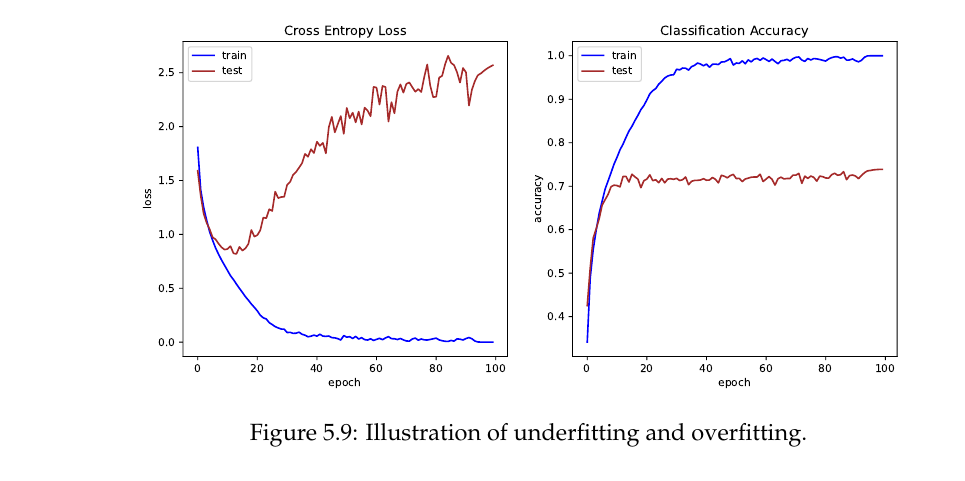

## Que hacemos para esto?

* Incrementar el numero de datos: Por ejemplo se tienen imagenes de gente sentada. Se entrena con estas imagenes. Se prueba con gente de pie. Depronto la prueba no da bunenos resultados. Se puede alimentar la base de datos con personas de pie y entrenarlo con una mayor cantidad de datos. Se espera que la prueba mejor en sus resultados.  Como hacemos para obtener mas datos?

    * Obtenga nuevos datos de la internet, gestionelos (data acquisition)
    ImageNet, CIFAR-10, CIFAR-100, MNIST, Flower Data Set, etc.

    * **Data Augmentation** (aumento de datos mediante:
        * rotacion
        * estira (en $x$ o en $y$ o en ambos)
        * crop (corta partes de la imagen.
    Hay un pquete muy bueno para esto: PIL: Python Image Library,
    Pillow es una interface util para este paquete.


## Reducion del numero de parametros.
    * Reduccion de nueronas
    * Reduccion de capas
    * Reduccion de otros parametros

## Early Stopping.
    Parada temprana.

## Dropout.
Geoffrey E. Hinton de la Universidad de Toronto, 2012, introdujo esta
tecnica.
La idea es elminar neuronas en cada capa (o algunas capas) de forma aleatoria.
Una imagen vale mas que mil palabras.



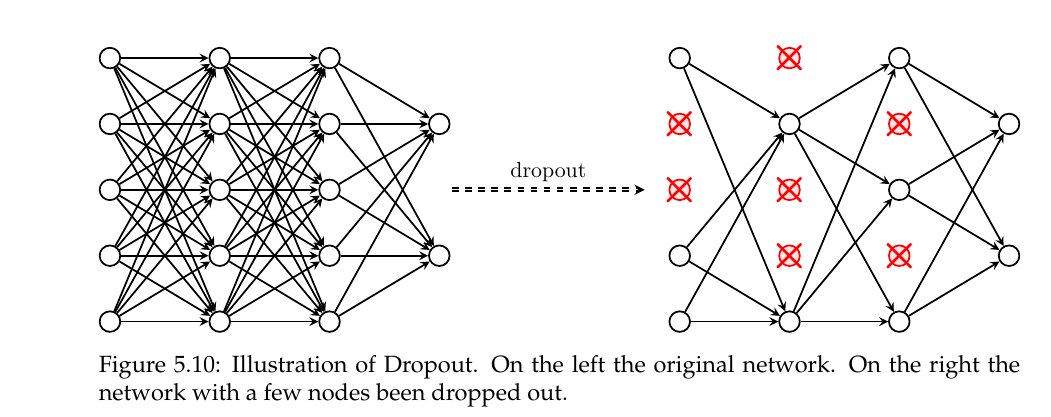

En el ejemplo del VGGNet de arriba, use el 20% en Dropout. (0.2)

El resultado en la proxima celda.

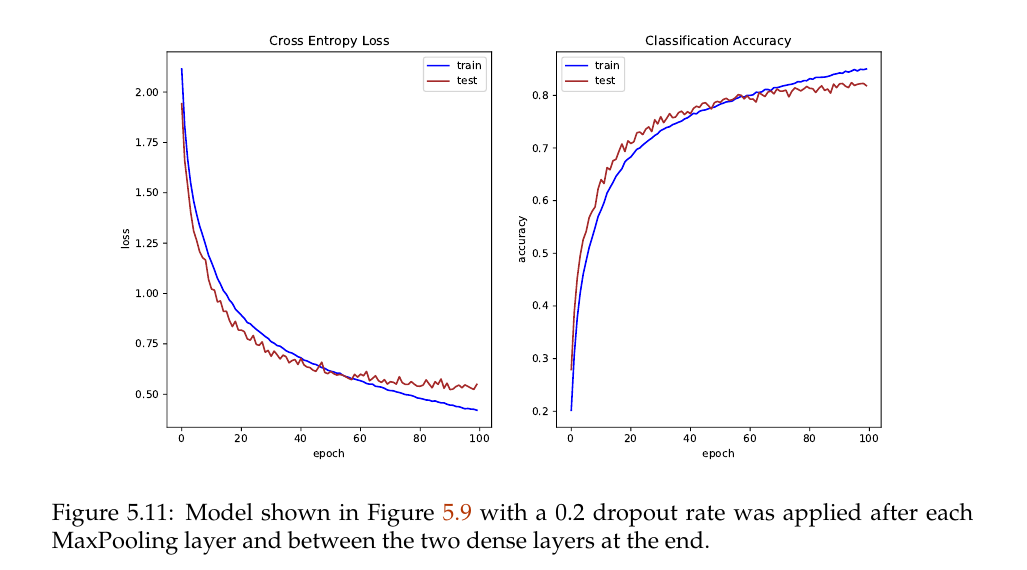

## Regulaziacion sobre la funcion de costo

$$ J_1(\theta) = C(\theta) + \lambda \| \Theta \|_1 $$
$$ J_2(\theta) = C(\theta) + \lambda \| \Theta \|^2 $$
En el primer caso usamos la norma $\ell_1$.
En el segundo caso usamos la norma $\ell_2$.

[Keras ofrece una lista extensa de regularizadores](https://keras.io/api/layers/regularizers/).

## Batch Normalizacion.
Esta tecnica fue creada por Sergey Ioffe y Christian Szegedy en 2015. La idea es hacer una normalizacion estandarizada. Se resta la media y se divide por la desviacion estandard $\sigma$. Donde y cuando se divide?

Cada vez que se calcule un

$$z = \Theta x + b $$
En este momento se estandarizan los datos (restar media y dividir por la desviacion estandard.)
Que ventajas tiene?

ChatGPT dice:

* Converge mas rapido
* Mayores ratas de aprendizje
* Reduce el sobre ajuste
* Ayuda con el vanishing/exploding gradient
* agrega regularizacion

Tambien
[Keras documentation](https://keras.io/api/layers/normalization_layers/batch_normalization/)

tiene una buena documentacion.



# Proxima clase: Redes Convolucionales Populares:
* LeNet5 (1998)
* AlexNet
* VGGNet
* GoogleNet
* ResNet: Good for NLP.
* LSTM  (buenas para NLP:Natural Language Processing)